In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import PIL
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('user uploaded file "{name}" with length {length} bytes'.format(name = fn, length = len(uploaded[fn])))

  !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle (2).json to kaggle (2) (3).json
user uploaded file "kaggle (2) (3).json" with length 69 bytes
mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

Dataset URL: https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign
License(s): unknown
skin-cancer-malignant-vs-benign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
!unzip "/content/skin-cancer-malignant-vs-benign.zip" -d '/content/uncompressed'

Archive:  /content/skin-cancer-malignant-vs-benign.zip
replace /content/uncompressed/data/test/benign/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pathlib
data_train = pathlib.Path('/content/uncompressed/train')

In [ ]:

data_test = pathlib.Path('/content/uncompressed/test')

In [ ]:
train_images_dict = {
    'malignant': list(data_train.glob('malignant/*')),
    'benign': list(data_train.glob('benign/*'))
}


train_labels_dict = {
    'malignant':0,
    'benign':1,

}


test_images_dict = {
    'malignant': list(data_test.glob('malignant/*')),
    'benign': list(data_test.glob('benign/*'))
}

test_labels_dict = {
    'malignant':0,
    'benign':1,

}

In [ ]:
#for train

In [ ]:
image_count = len(list(data_train.glob('*/*.jpg')))
print(image_count)

2637


In [ ]:
image_count = len(list(data_test.glob('*/*.jpg')))
print(image_count)

660


In [ ]:
malignant = list(data_train.glob('malignant/*'))
malignant[:5]

[PosixPath('/content/uncompressed/train/malignant/1404.jpg'),
 PosixPath('/content/uncompressed/train/malignant/1325.jpg'),
 PosixPath('/content/uncompressed/train/malignant/1062.jpg'),
 PosixPath('/content/uncompressed/train/malignant/518.jpg'),
 PosixPath('/content/uncompressed/train/malignant/719.jpg')]

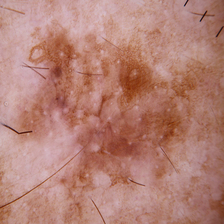

In [ ]:
PIL.Image.open(str(malignant[1]))

In [ ]:
x_train , y_train =[], []
for cancer_name, images in train_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img,(180,180))
    x_train.append(resized_image)
    y_train.append(train_labels_dict[cancer_name])


In [ ]:
x_test, y_test =[], []
for cancer_name, images in test_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img,(180,180))
    x_test.append(resized_image)
    y_test.append(test_labels_dict[cancer_name])


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255


In [ ]:
num_classes = 2
model = Sequential([
     layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
     layers.MaxPooling2D(),
     layers.Flatten(),
     layers.Dense(128, activation = 'relu'),
     layers.Dense(num_classes, activation = 'softmax')
 ])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs = 10)

Epoch 1/10
83/83 [==============================] - 92s 1s/step - loss: 0.6171 - accuracy: 0.6663
Epoch 2/10
83/83 [==============================] - 87s 1s/step - loss: 0.4686 - accuracy: 0.7702
Epoch 3/10
83/83 [==============================] - 88s 1s/step - loss: 0.3922 - accuracy: 0.8024
Epoch 4/10
83/83 [==============================] - 90s 1s/step - loss: 0.3687 - accuracy: 0.8149
Epoch 5/10
83/83 [==============================] - 87s 1s/step - loss: 0.3660 - accuracy: 0.8161
Epoch 6/10
83/83 [==============================] - 93s 1s/step - loss: 0.3544 - accuracy: 0.8191
Epoch 7/10
83/83 [==============================] - 85s 1s/step - loss: 0.3245 - accuracy: 0.8453
Epoch 8/10
83/83 [==============================] - 89s 1s/step - loss: 0.3204 - accuracy: 0.8426
Epoch 9/10
83/83 [==============================] - 84s 1s/step - loss: 0.2927 - accuracy: 0.8604
Epoch 10/10
83/83 [==============================] - 89s 1s/step - loss: 0.2962 - accuracy: 0.8544


In [ ]:
model.evaluate(x_test_scaled, y_test)

21/21 [==============================] - 9s 412ms/step - loss: 0.4107 - accuracy: 0.8091


[0.41068747639656067, 0.8090909123420715]

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomContrast(0.1, 0.1),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1)
    ]
)

In [ ]:
num_classes = 2
model = Sequential([
     data_augmentation,
     layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
     layers.MaxPooling2D(),
     layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
     layers.MaxPooling2D(),
     layers.Flatten(),
     layers.Dense(128, activation = 'relu'),
     layers.Dense(num_classes, activation = 'softmax')
 ])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

model.fit(x_train_scaled, y_train, epochs = 20)

Epoch 1/20
83/83 [==============================] - 108s 1s/step - loss: 0.6042 - accuracy: 0.6803
Epoch 2/20
83/83 [==============================] - 106s 1s/step - loss: 0.4661 - accuracy: 0.7721
Epoch 3/20
83/83 [==============================] - 103s 1s/step - loss: 0.4088 - accuracy: 0.8062
Epoch 4/20
83/83 [==============================] - 105s 1s/step - loss: 0.4329 - accuracy: 0.7895
Epoch 5/20
83/83 [==============================] - 103s 1s/step - loss: 0.3911 - accuracy: 0.8127
Epoch 6/20
83/83 [==============================] - 102s 1s/step - loss: 0.3912 - accuracy: 0.8100
Epoch 7/20
83/83 [==============================] - 104s 1s/step - loss: 0.3960 - accuracy: 0.7975
Epoch 8/20
83/83 [==============================] - 107s 1s/step - loss: 0.3671 - accuracy: 0.8134
Epoch 9/20
83/83 [==============================] - 105s 1s/step - loss: 0.3637 - accuracy: 0.8305
Epoch 10/20
83/83 [==============================] - 103s 1s/step - loss: 0.3689 - accuracy: 0.8195
Epoch 11/

In [ ]:
model.evaluate(x_test_scaled, y_test)

21/21 [==============================] - 6s 284ms/step - loss: 0.3464 - accuracy: 0.8530


[0.3464251160621643, 0.8530303239822388]